Data Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

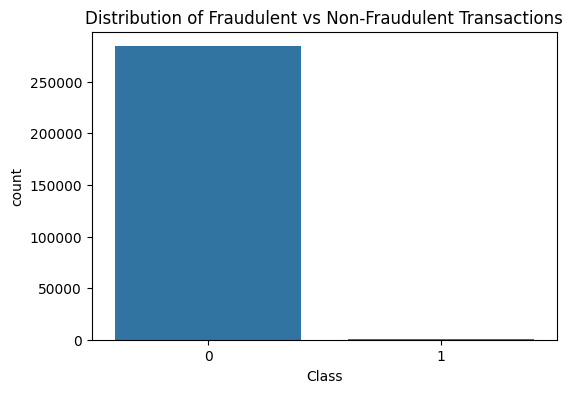


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Best Parameters from Grid Search:
{'max_depth': 20, 'n_estimators': 200}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/datasets/credit_card.csv')

# Exploratory Data Analysis (EDA)
print("Data Overview:")
print(data.head())  # Display first few rows
print("\nData Summary:")
print(data.describe())  # Summary statistics
print("\nData Info:")
print(data.info())  # Information about data types and missing values

# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Data Cleaning
# Handle missing values if any (uncomment if needed)
# data = data.fillna(method='ffill')

# Feature Engineering
# Apply logarithmic transformation to 'Amount' feature
data['Amount'] = np.log1p(data['Amount'])

# Dealing with Imbalanced Data
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Apply SMOTE to balance the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Model Selection
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Validation
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20]  # Maximum depth of trees
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# Optional: Retrain the model with the best parameters if needed
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'credit_fraud_model.pkl')

['credit_fraud_model.pkl']

In [ ]:
model=joblib.load('credit_fraud_model.pkl')

In [ ]:
pred = model.predict([[0, -1.359807134,-0.072781173,  2.536346738,  1.378155224,  -0.33832077,  0.462387778,  0.239598554,  0.098697901,  0.36378697, 0.090794172,  -0.551599533, -0.617800856,-0.991389847,  -0.311169354, 1.468176972 ,-0.470400525,0.207971242,  0.02579058, 0.40399296,0.251412098, -0.018306778, 0.277837576,-0.11047391,  0.066928075,0.128539358 ,-0.189114844 ,0.133558377  ,-0.021053053 ,149.62
]])
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")


Normal Transcation


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
